In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import *

In [2]:
cols = ['Week Number', 'RequestType', 'Created Year', 'CD', 'Longitude', 'Latitude']
df = pd.read_csv('311_parsed.csv', usecols = cols)

In [50]:
c = df.groupby(['Created Year','Week Number','RequestType']).size().unstack()
c['Total'] = c.sum(axis=1)
c

RequestType               Bulky Items  Dead Animal Removal  Electronic Waste  \
Created Year Week Number                                                       
2015         32                4192.0                274.0             330.0   
             33                8313.0                499.0             672.0   
             34                8111.0                490.0             704.0   
             35                7685.0                473.0             641.0   
             36                8494.0                421.0             606.0   
             37                8143.0                471.0             603.0   
             38                9037.0                439.0             755.0   
             39               11289.0                491.0             963.0   
             40                9901.0                457.0             801.0   
             41                8230.0                436.0             654.0   
             42                8349.0                449.0             597.0   
             43                8006.0                440.0             645.0   
             44                8028.0                470.0             746.0   
             45                7410.0                426.0             726.0   
             46                6835.0                427.0             724.0   
             47                6913.0                416.0             813.0   
             48                5428.0                351.0             671.0   
             49                7556.0                443.0             987.0   
             50                7274.0                444.0            1039.0   
             51                6506.0                366.0             791.0   
             52                4727.0                352.0             586.0   
             53                4873.0                268.0             632.0   
2016         1                 6691.0                431.0             843.0   
             2                 6989.0                474.0             848.0   
             3                 6734.0                490.0             787.0   
             4                 6908.0                446.0             784.0   
             5                 6713.0                406.0             788.0   
             6                 6540.0                474.0             667.0   
             7                 6405.0                379.0             746.0   
             8                 7990.0                387.0             902.0   
...                               ...                  ...               ...   
2018         1                 9285.0                450.0             770.0   
             2                 9459.0                480.0             816.0   
             3                11021.0                513.0             793.0   
             4                10029.0                469.0             877.0   
             5                10090.0                456.0             787.0   
             6                10748.0                409.0             891.0   
             7                 7835.0                442.0             678.0   
             8                 7712.0                273.0             679.0   
             9                 9460.0                381.0             754.0   
             10                9811.0                355.0             738.0   
             11                9317.0                408.0             702.0   
             12                8957.0                396.0             655.0   
             13               10330.0                460.0             807.0   
             14               10679.0                522.0             812.0   
             15               10278.0                538.0             772.0   
             16                9930.0                538.0             785.0   
             17               10759.0                508.0             818.0   


In [25]:
cols = ['Bulky Items', 'Dead Animal Removal', 'Electronic Waste', 'Feedback', 'Graffiti Removal', 'Homeless Encampment', 'Illegal Dumping Pickup', 'Metal/Household Appliances', 'Multiple Streetlight Issue', 'Other', 'Report Water Waste', 'Single Streetlight Issue']

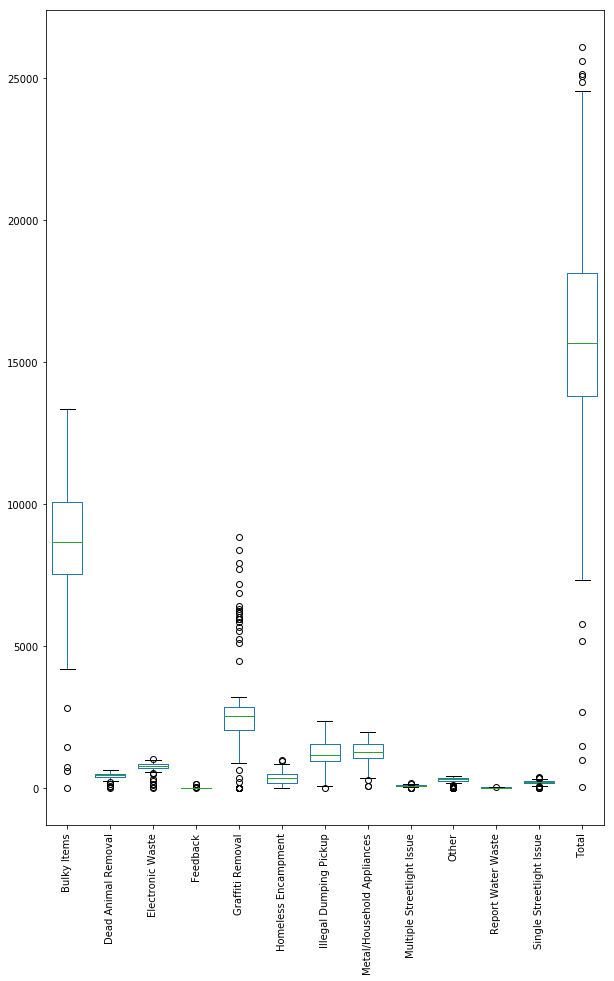

In [105]:
#Boxplot of all data to visualize any outliers
plt.rcParams.update({'font.size': 10})
c.plot.box(return_type='dict', widths = 0.7, figsize=(10,15))
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
#Max Outliers for individual weekly request grouped by year:
for x in cols:
    max_specific_outliers = c[c[x] > c[x].mean() + 2 * c[x].std()]
    max_specific_outliers = max_specific_outliers[[x,'Total']]

In [34]:
#Min Outliers for individual weekly request types grouped by year:
for x in cols:
    min_specific_outliers = c[c[x] < c[x].mean() - 2 * c[x].std()]
    min_specific_outliers = min_specific_outliers[[x,'Total']]

In [107]:
#Max Outliers for total of weekly requests grouped by year
max_total_outliers = c[c['Total'] > c['Total'].mean() + 2 * c['Total'].std()]
max_total_outliers = max_total_outliers[['Total']]
max_total_outliers

RequestType                 Total
Created Year Week Number         
2018         15           25154.0
             26           25082.0
             28           25627.0
             29           26108.0

In [38]:
#Min Outliers for total of weekly requests grouped by year
min_total_outliers = c[c['Total'] < c['Total'].mean() - 2 * c['Total'].std()]
min_total_outliers = min_total_outliers[['Total']]
min_total_outliers

RequestType                Total
Created Year Week Number        
2015         32           5783.0
2016         53           1005.0
2017         43           2699.0
             47             44.0
             48           5170.0
2018         30           1475.0

In [44]:
c['Diff'] = c['Total'].diff()
c['Diff'] = c['Diff'].abs()

In [45]:
c

RequestType               Bulky Items  Dead Animal Removal  Electronic Waste  \
Created Year Week Number                                                       
2015         32                4192.0                274.0             330.0   
             33                8313.0                499.0             672.0   
             34                8111.0                490.0             704.0   
             35                7685.0                473.0             641.0   
             36                8494.0                421.0             606.0   
             37                8143.0                471.0             603.0   
             38                9037.0                439.0             755.0   
             39               11289.0                491.0             963.0   
             40                9901.0                457.0             801.0   
             41                8230.0                436.0             654.0   
             42                8349.0                449.0             597.0   
             43                8006.0                440.0             645.0   
             44                8028.0                470.0             746.0   
             45                7410.0                426.0             726.0   
             46                6835.0                427.0             724.0   
             47                6913.0                416.0             813.0   
             48                5428.0                351.0             671.0   
             49                7556.0                443.0             987.0   
             50                7274.0                444.0            1039.0   
             51                6506.0                366.0             791.0   
             52                4727.0                352.0             586.0   
             53                4873.0                268.0             632.0   
2016         1                 6691.0                431.0             843.0   
             2                 6989.0                474.0             848.0   
             3                 6734.0                490.0             787.0   
             4                 6908.0                446.0             784.0   
             5                 6713.0                406.0             788.0   
             6                 6540.0                474.0             667.0   
             7                 6405.0                379.0             746.0   
             8                 7990.0                387.0             902.0   
...                               ...                  ...               ...   
2018         1                 9285.0                450.0             770.0   
             2                 9459.0                480.0             816.0   
             3                11021.0                513.0             793.0   
             4                10029.0                469.0             877.0   
             5                10090.0                456.0             787.0   
             6                10748.0                409.0             891.0   
             7                 7835.0                442.0             678.0   
             8                 7712.0                273.0             679.0   
             9                 9460.0                381.0             754.0   
             10                9811.0                355.0             738.0   
             11                9317.0                408.0             702.0   
             12                8957.0                396.0             655.0   
             13               10330.0                460.0             807.0   
             14               10679.0                522.0             812.0   
             15               10278.0                538.0             772.0   
             16                9930.0                538.0             785.0   
             17               10759.0                508.0             818.0   


In [46]:
#Max Outliers for change in total number of weekly requests grouped by year
max_change_outliers = c[c['Diff'] > c['Diff'].mean() + 2 * c['Diff'].std()]
max_change_outliers = max_change_outliers[['Diff']]
max_change_outliers

RequestType                  Diff
Created Year Week Number         
2016         53           11553.0
2017         1            13847.0
             43           12770.0
             44           10203.0
             47           10146.0
             49           11170.0
2018         30           24633.0

In [47]:
#Min Outliers for change in total number of weekly requests grouped by year
min_change_outliers = c[c['Diff'] < c['Diff'].mean() - 2 * c['Diff'].std()]
min_change_outliers = min_change_outliers[['Diff']]
min_change_outliers

,RequestType,Diff
Created Year,Week Number,
